Connection and test notebook Instrumentation TP1

In [ ]:
import pyvisa as visa
import time
import numpy as np
import csv

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from matplotlib import cm
plt.rcParams["font.sans-serif"] = "Raleway"
filesave="MesuresFiltre.csv"


#rm = visa.ResourceManager('@py')
rm = visa.ResourceManager()
instruments = rm.list_resources()
#oscilloscope = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZA192712222::INSTR')
#generator= rm.open_resource('USB0::0x0400::0x09C4::DG1D184350683::INSTR')

oscilloscope = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZA192712238::INSTR')
generator= rm.open_resource('USB0::0x0400::0x09C4::DG1D184350683::INSTR')

Connection Test

In [ ]:
FREQ_MIN=2 #Power of 10
FREQ_MAX=5 #Power of 10
NB=60
filesave="MesuresFiltre.csv"


#rm = visa.ResourceManager('@py')
rm = visa.ResourceManager()
instruments = rm.list_resources()
oscilloscope = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZA192712222::INSTR')
generator= rm.open_resource('USB0::0x0400::0x09C4::DG1D184350683::INSTR')


print(oscilloscope)
print(instruments)
print(oscilloscope.write("*IDN?"))
time.sleep(5)
print(oscilloscope.read())



In [ ]:
instruments

In [ ]:
FREQ_MIN=2 #Power of 10
FREQ_MAX=5 #Power of 10
NB=60


In [ ]:
#generator.query("*RST")
#oscilloscope.query("*RST")
oscilloscope.write(":AUT")

In [ ]:
oscilloscope.write(":RST")

In [ ]:
   
#print(oscilloscope.query(":LA:STATe?"))
#print(oscilloscope.query(":CHANnel1:DISPlay?"))
try:
    status=oscilloscope.query(":CHANnel1:DISPlay?")
    print(status)
except:
    status=0
    print(status)
print(status)


In [ ]:
:ACQuire:AVERages?
data=float(oscilloscope.query(":ACQuire:AVERages? CHAN1"))
data

READ DATA

In [ ]:
xa=float(oscilloscope.query(":MEAS:FREQ? CHAN1",2))
xa

In [ ]:
xb=  oscilloscope.query(":WAVeform:STARt? CHAN1",2)
xb

In [ ]:
print(oscilloscope.write(":WAVeform:FORMat?"))

In [ ]:
myScope=oscilloscope
oscilloscope.write("WGEN:FREQ 50000")
oscilloscope.write("WGEN:FUNC SIN")
oscilloscope.write("WGEN:OUTP ON")
oscilloscope.write("WGEN:VOLT 2")

oscilloscope.write(":TIMebase:SCALe 3.0E-5")
oscilloscope.write(":WAVeform:SOURce CHANnel1")
oscilloscope.write(":WAVeform:FORMat ASCII")
oscilloscope.write(":WAVeform:POINts 1000")

datai = oscilloscope.query("WAVeform:DATA?")

print(datai)



In [ ]:
def delete_hash(string):
    return string.replace("#", "")
def extract_data(string, separator=','):
    return [float(x) for x in string.split(separator)]
def linspace(start, stop, n):
    return np.linspace(start, stop, n)
def delete_first_element(list):
    return list[1:]
data=delete_hash(datai)

data1=extract_data(data)
data1=delete_first_element(data1)
x=linspace(0,len(data1), len(data1))

In [ ]:
datai

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, data1, '-o')

In [ ]:
oscilloscope.write(":WAVeform:SOURce CHAN1")
oscilloscope.write(":WAVeform:FORMat WORD CHAN1")
oscilloscope.write(":WAV:MODE RAW")
#oscilloscope.write(":WAVeform:MODE RAW CHANnel1")
xb=  oscilloscope.query(":WAV:DATA?")
xb
#xb=  oscilloscope.query(":WAVeform:STARt? CHAN1")
#xb

In [ ]:
generator.query("*RST")
oscilloscope.query("*RST")
time.sleep(5)
# Ruta de una banda de frequency
results = np.zeros((NB, 5))
generator.query("OUTP ON")

Function tho change the parameters of function generator

In [ ]:
generator.write("APPL:SIN 3000,3.0,-2.5")


In [ ]:
var1='APPL'
var2='SIN'
var3='5000'
var4='3.0'
var5='-2.5'


def concatenation(var1,var2,var3,var4,var5):
    finalvar=var1+':'+var2+' '+var3+','+var4+','+var5
    return finalvar
fvar=concatenation(var1,var2,var3,var4,var5)
print(fvar)
myvar1 = "Python"

myvar2 = "Guides"

# use + operator to concatenate both strings

myvar3 = myvar1 + ' ' + myvar2

print(myvar3)

In [ ]:
time_base = oscilloscope.query(":TIM:SCAL?")
print(time_base)
#oscilloscope.query(":TIM:SCAL %f"%(float(time_base)/4.0))
#oscilloscope.query(":CHAN2:COUPling AC",4)
AX=oscilloscope.query(":MEASure:ITEM? OVERshoot,CHANnel2",2)
AX

STATUS

In [ ]:
oscilloscope.write(":TIM:SCAL %f"%(float(time_base)/4.0))

In [ ]:
oscilloscope.write(":CHANnel1:TCAL 0.00000008 %f")

In [ ]:
oscilloscope.write(":CHAN2:COUP AC")

In [ ]:
aux1=float(oscilloscope.query(":MEASure:PDELay? CHAN2",1))

In [ ]:
#aux1=float(oscilloscope.query(":MEASure:ITEM? FPHase,CHANnel2",2))
#:MEASure:ITEM OVERshoot,CHANnel2
#:MEASure:ITEM? OVERshoot,CHANnel2
oscilloscope.write(":MEASure:ITEM OVERshoot,CHANnel2")        
oscilloscope.query(":MEASure:ITEM? OVERshoot,CHANnel2")                


In [ ]:
oscilloscope.write(":MEASure:ITEM VPP,CHANnel2")        
oscilloscope.query(":MEASure:ITEM? VPP,CHANnel2") 

Cycle with the generator

In [ ]:
f=500
generator.write("APPL:SIN %f,5.0,0.0" % (f,))

In [ ]:
'''
time_base = oscilloscope.query(":TIM:SCAL?")
time_base
oscilloscope.write(":TIM:SCAL %f"%(float(time_base)/4.0))
oscilloscope.write(":CHAN2:COUP AC")
'''
oscilloscope.write(":RST")
oscilloscope.write(":AUT")
oscilloscope.write(":CHAN2:COUP AC")
oscilloscope.query(":MEASure:ITEM? FDELay,CHANnel1,CHANnel2",5)

In [ ]:
import numpy as np
FREQ_MIN=3 #Power of 10
FREQ_MAX=5 #Power of 10
NB=10
Vector=np.logspace(FREQ_MIN, FREQ_MAX, NB)
Vector

In [ ]:

FREQ_MIN=3 #Power of 10

FREQ_MAX=5 #Power of 10
f=100
NB=20
fs=np.logspace(FREQ_MIN, FREQ_MAX, NB)
generator= rm.open_resource('USB0::0x0400::0x09C4::DG1D184350683::INSTR')

generator.write("APPL:SIN %f,5.0,0.0" % (f,))
oscilloscope.write(":AUT")

fs
#FREQ_MAX

In [ ]:
oscilloscope.write(":AUT")


In [ ]:
import numpy as np
FREQ_MIN=0.5 #Power of 10
FREQ_MAX=1.5 #Power of 10
NB=10
Vector=np.logspace(FREQ_MIN, FREQ_MAX, NB)
Vector

In [ ]:
generator.write("APPL:SIN %f,3.3.0,0.0" % (1,))
oscilloscope.write(":AUT")



In [ ]:
generator.write("APPL:SIN %f,3.3.0,0.0" % (100,))

In [ ]:
oscilloscope.write(":AUT")

Cycle to read an save data

In [ ]:
#oscilloscope.write(":MEASure:ITEM VPP,CHANnel2")        
#oscilloscope.query(":MEASure:ITEM? VPP,CHANnel2") 
#oscilloscope.write(":MEASure:ITEM VPP,CHANnel1")        
#oscilloscope.query(":MEASure:ITEM? VPP,CHANnel1") 
import pyvisa as visa
import time
import numpy as np
import csv

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from matplotlib import cm
plt.rcParams["font.sans-serif"] = "Raleway"
filesave="MesuresFiltre.csv"


#rm = visa.ResourceManager('@py')
rm = visa.ResourceManager()
instruments = rm.list_resources()
#oscilloscope = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZA192712222::INSTR')
#generator= rm.open_resource('USB0::0x0400::0x09C4::DG1D184350683::INSTR')

oscilloscope = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZA192712238::INSTR')
generator= rm.open_resource('USB0::0x0400::0x09C4::DG1D184350683::INSTR')


cont=1
NB=50
results = np.zeros((NB, 6))
#FREQ_MIN=0.2 #Power of 10
FREQ_MIN=0 #Power of 10

FREQ_MAX=2 #Power of 10
#oscilloscope.write(":RST")
#generator.write("APPL:SIN %f,3.3.0,0.0" % (FREQ_MAX/2,))
time.sleep(2)
#oscilloscope.write(":AUT")
time.sleep(5)
filesave="MesuresFiltre.csv"
cont=0
for idx, f in enumerate(np.logspace(FREQ_MIN, FREQ_MAX, NB)):
    #generator.write("APPL:SIN 3000,3.0,-2.5")
    
    generator.write("APPL:SIN %f,3.3.0,0.0" % (f,))
    #generator.query("APPL:SIN %f,1.0,0.0" % (f,))
    time.sleep(2)
    if f>2000 and cont<1:
        oscilloscope.write(":AUT")
        time.sleep(3)
        cont=cont+1
    if f>50000 and cont<2:
        osciloscope.write(":AUT")
        time.sleep(3)
        cont=cont+1
        
    #time.sleep(5) # Necesario para que se lleve a cabo el autoajuste
    #time.sleep(0.2)
    results[idx, 5] = float(oscilloscope.query(":MEASure:ITEM? FPHase,CHANnel2,CHANnel1", 0.8)) #:MEASure:FREQuency
    #time.sleep(0.2)
    
    results[idx, 0] = float(oscilloscope.query(":MEASure:ITEM? FDELay,CHANnel2,CHANnel1", 0.8)) #:MEASure:FREQuency
    #time.sleep(0.2)
    results[idx, 1] = float(oscilloscope.query(":MEASure:ITEM? VPP,CHANnel1",0.8)) ## :WAV:DATA?
    #time.sleep(0.5)
    results[idx, 2] = float(oscilloscope.query(":MEASure:ITEM? VPP,CHANnel2",0.8)) ##:MEASure:VRMS?
    #time.sleep(0.5)
    results[idx, 3] = float(oscilloscope.query(":MEASure:ITEM? FREQuency,CHANnel2",0.8)) ##:MEASure:VRMS?
    results[idx,4]=f
    time_base = oscilloscope.query(":TIM:SCAL?")
    #oscilloscope.write(":TIM:SCAL %f"%(float(time_base)/4.0))
    # Change to mode AC...
    #oscilloscope.write(":RST")
    #oscilloscope.write(":AUT")
    #oscilloscope.write(":CHAN1:COUP AC")
    
    #oscilloscope.write(":TIM:SCAL %f"%(float(time_base)/4.0))
    # Change to mode AC...
    oscilloscope.write(":CHAN2:COUP AC")
    cont=cont+1
    print(cont)
    print("APPL:SIN %f,1.0,0.0" % (f,))
    print(results[idx, 4])
    print(results[idx, 0])
    print(results[idx, 1])
    print(results[idx, 2])
    print('frequency=')
    print(results[idx, 3])
    print('therory f')
    print(f)
    #oscilloscope.write(":AUT")
    
filesave="MesuresFiltre.csv"
with open(filesave, "w") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(["#FdDelay", "In (Vrms)", "Out (Vrms)", 'Frequency_real','Frequency_theory','Fphase'])
    writer.writerows(results)
    
   


In [ ]:
filesave="MesuresFiltre.csv"
with open(filesave, "w") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(["#FdDelay", "In (Vrms)", "Out (Vrms)", 'Frequency_real','Frequency_theory','Fphase'])
    writer.writerows(results)

In [ ]:
oscilloscope.query(":MEASure:ITEM? FPHase,CHANnel1,CHANnel2", 0.2)

In [61]:
import pandas as pd
data = pd.read_csv("MesuresFiltre.csv") 
#data = data.dropna(axis="columns", how="any")
data = data.dropna()
results=data
data.head()


,#FdDelay,In (Vrms),Out (Vrms),Frequency_real,Frequency_theory,Fphase
5,0.075,3.44,0.700,1.207729,1.206793,37.66520
7,0.057,3.44,0.724,1.322751,1.325711,33.95405
9,0.053,3.44,0.752,1.457726,1.456348,27.14286
11,0.035,3.44,0.768,1.605136,1.599859,26.76385
13,0.027,3.44,0.776,1.760563,1.757511,24.80769


In [62]:
s = data.iloc[:,1]
#column_B = a_dataframe.iloc[:, 1]
s

5     3.44
7     3.44
9     3.44
11    3.44
13    3.44
15    3.44
17    3.44
33    3.44
35    3.44
37    3.44
39    3.44
41    3.44
43    3.44
45    3.44
47    3.44
49    3.44
51    3.44
53    3.44
55    3.44
57    3.44
59    3.44
61    3.44
63    3.44
65    3.44
67    3.44
69    3.44
71    3.44
73    3.44
75    3.44
77    3.44
79    3.44
81    3.44
83    3.44
85    3.44
87    3.44
89    3.44
91    3.44
93    3.44
95    3.44
97    3.44
Name: In (Vrms), dtype: float64

ValueError: 'min' is not a valid value for which; supported values are 'major', 'minor', 'both'

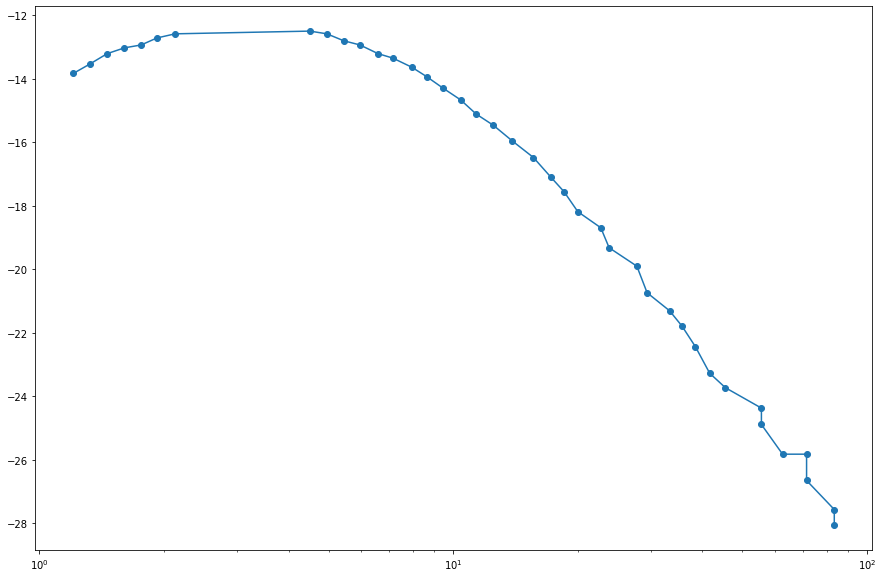

In [63]:
## To plot the amplitude
import numpy as np
# Visualizacion de la ganancia en función de las frecuencias.
gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])
gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])

plt.figure(figsize=(15, 10))
plt.semilogx(data.iloc[:, 3], gain, '-o')
plt.grid(True, 'min')
plt.grid(True, 'Max')
#plt.ylim( (np.min(gain)-2.0, np.max(gain)+2.0) )
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.title("Diagram from Bode Filter")
plt.show()

In [ ]:
# To plot the phase

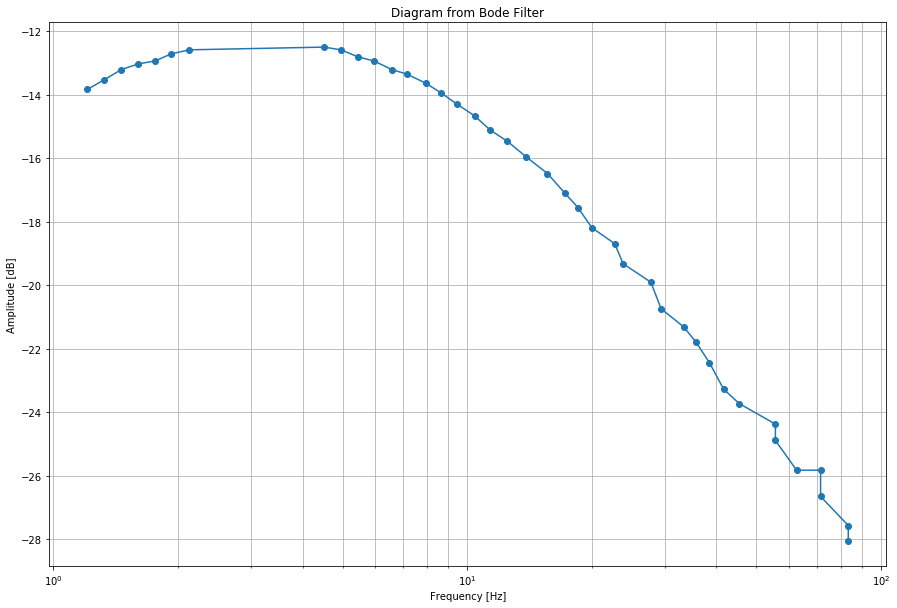

In [64]:
import numpy as np
# Visualizacion de la ganancia en función de las frecuencias.
gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])
gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])



plt.figure(figsize=(15, 10))
plt.semilogx(data.iloc[:, 3], gain, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
#plt.ylim( (np.min(gain)-2.0, np.max(gain)+2.0) )
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.title("Diagram from Bode Filter")
plt.show()

BOTH GRAPHS

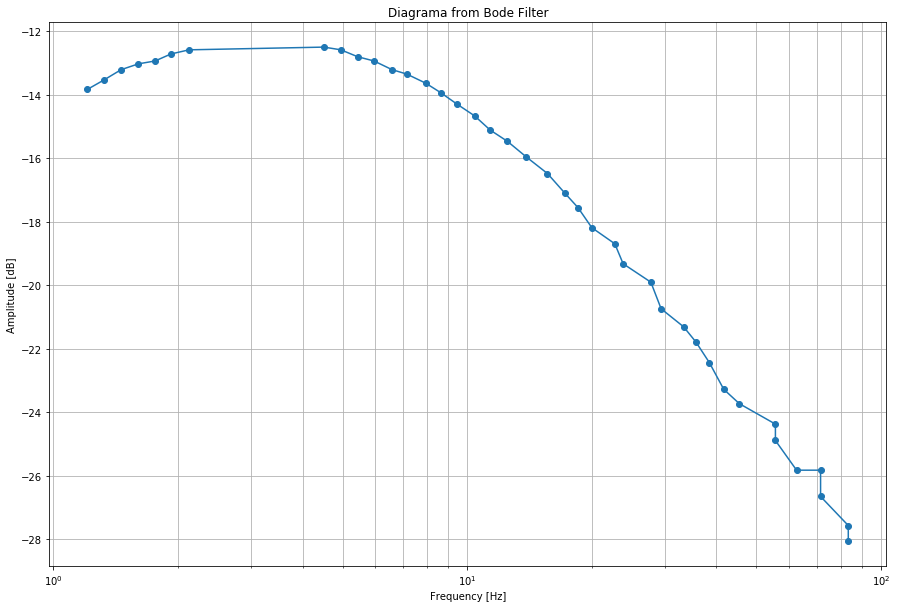

In [65]:
from scipy import signal
from matplotlib.figure import Figure 
#b, a = signal.butter(1, 1.0/(27e5*1.5e-9), 'low', analog=True)
b, a = signal.butter(1, 1.0/(2.7e6*22e-9), 'low', analog=True)
w, h = signal.freqs(b, a)
f_th = w/2*np.pi
g_th = 20 * np.log10(abs(h))
f_me =data.iloc[:, 4]

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
ph_me = -2.0*np.pi*(data.iloc[:, 3]/periods)

ph_me=data.iloc[:,5]

##############
###EXPERIMENTAL#########
gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])

##########
####################BOTH######
plt.figure(figsize=(15, 10))
plt.semilogx(data.iloc[:, 3], gain, '-o')
plt.semilogx(gain, gain, '-o')

plt.grid(True, 'minor')
plt.grid(True, 'major')
#plt.ylim( (np.min(gain)-2.0, np.max(gain)+2.0) )
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.title("Diagrama from Bode Filter")
plt.show() 
##############################


C:\Users\grove\anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


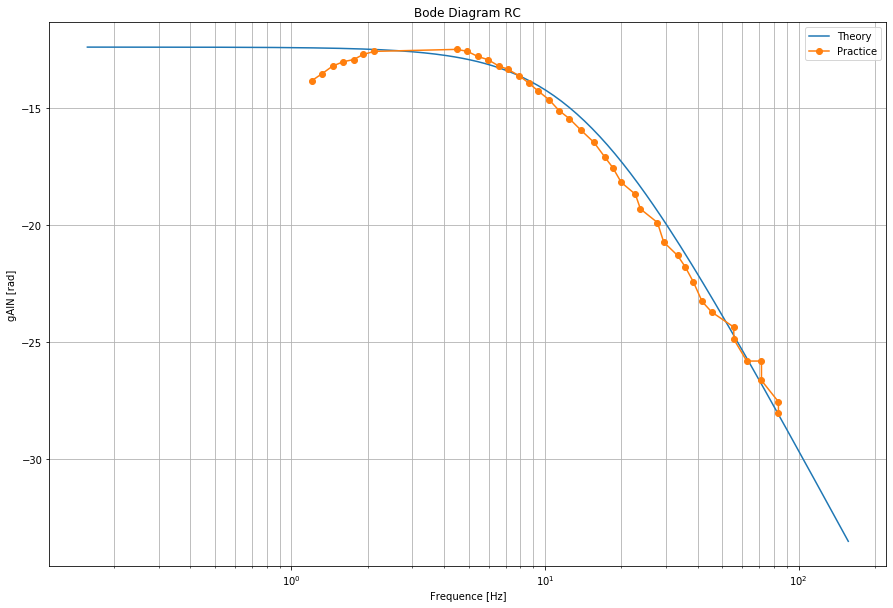

In [66]:
from scipy import signal

############Theoretical
#b, a = signal.butter(1, 1.0/(27e5*1.5e-9), 'low', analog=True)
b, a = signal.butter(1, 1.0/(2.7e6*22e-9), 'low', analog=True)
b, a = signal.butter(1, 1.0/(2.7e6*42e-9), 'low', analog=True)
#b, a = signal.butter(1, 1.0/(27e5*1.5e-9), 'low', analog=True)
w, h = signal.freqs(b, a)
f_th = w/2*np.pi
#g_th = 20 * np.log10(abs(h))
g_th = 20 * np.log10(abs(h)) 

f_me =data.iloc[:, 4]

ph_th = np.angle(h)


###########Plotting

f_me =data.iloc[:, 4]

gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
#ph_me = -2.0*np.pi*(data.iloc[:, 3]/periods)

ph_me=data.iloc[:,5]
#g_th = 20 * np.log10(abs(h))
g_th = 20*np.log10(abs(h))-12.4

plt.figure(figsize=(15, 10))
plt.semilogx(f_th, g_th, '-')
##
plt.semilogx(data.iloc[:, 3], gain, '-o')
#plt.semilogx(f_th, g_th, '-')

##

#plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('gAIN [rad]')
plt.xlabel(u'Frequence [Hz]')
plt.title("Bode Diagram RC")
plt.legend(("Theory","Practice"))


ax = plt.axes()
ax.set_facecolor("white")
# OR
ax.set(facecolor = "white")




#plt.margins(0.1, 0.1)
plt.savefig("FiltreRCGain.png")
plt.show()

PHASE DETECTION

C:\Users\grove\anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


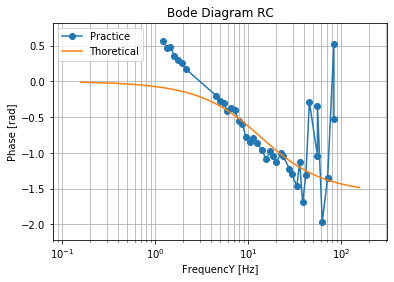

<Figure size 1080x720 with 0 Axes>

In [67]:
f_me =data.iloc[:, 4]

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 3]
ph_me = 2.0*np.pi*(data.iloc[:, 0]/periods)

#ph_me=data.iloc[:,5]

plt.semilogx(data.iloc[:, 3], ph_me, '-o')


#plt.figure(figsize=(15, 10))
plt.semilogx(f_th, ph_th, '-')
#plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Phase [rad]')
plt.xlabel(u'FrequencY [Hz]')


ax = plt.axes()
ax.set_facecolor("white")
# OR
ax.set(facecolor = "white")

plt.title("Bode Diagram RC")
plt.legend(("Practice", "Thoretical"))
plt.margins(0.1, 0.1)
plt.savefig("FiltreRCPhase.png")
plt.figure(figsize=(15, 10))
plt.show()

In [68]:
print(len(f_th))

print(len(data.iloc[:, 3]))

200
40


WITH PHASE DATA

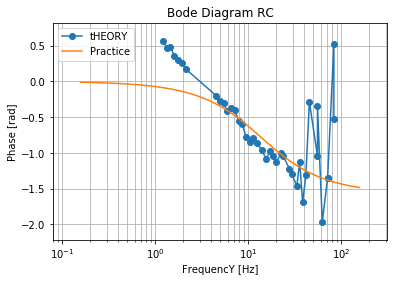

In [69]:
f_me =data.iloc[:, 4]

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
ph_me = 2.0*np.pi*(data.iloc[:, 3]/periods)
#ph_me = 2.0*np.pi*(data.iloc[:, 5]/periods)

#ph_me=data.iloc[:,5]

plt.semilogx(data.iloc[:, 3], ph_me, '-o')


#plt.figure(figsize=(15, 10))
plt.semilogx(f_th, ph_th, '-')
#plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Phase [rad]')
plt.xlabel(u'FrequencY [Hz]')
plt.title("Bode Diagram RC")
plt.legend(("tHEORY","Practice"))
plt.margins(0.1, 0.1)
plt.savefig("FiltreRCPhase.png")
plt.show()

PHASE CALCULATION

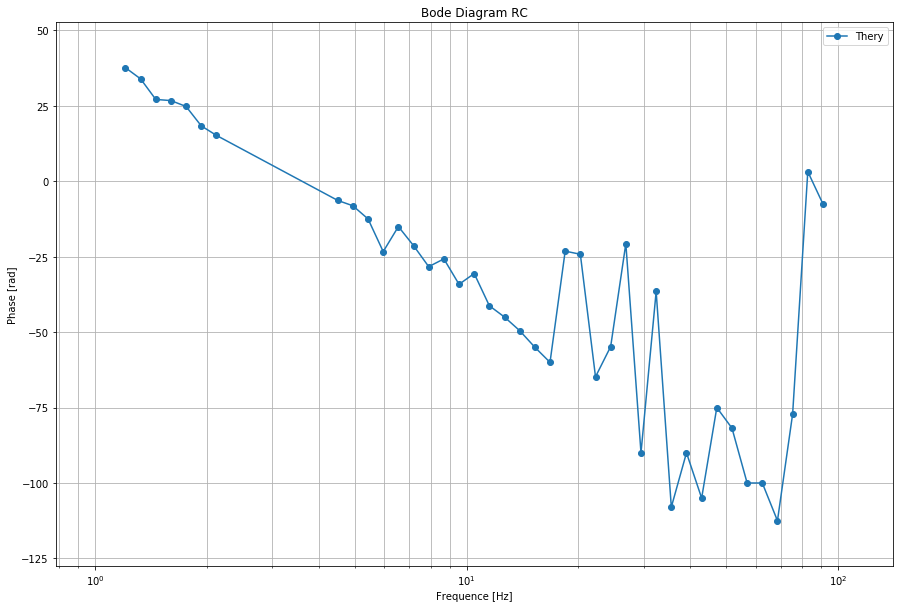

In [70]:
f_me =data.iloc[:, 4]

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
#ph_me = -2.0*np.pi*(data.iloc[:, 3]/periods)

ph_me=data.iloc[:,5]

plt.figure(figsize=(15, 10))
#plt.semilogx(f_th, ph_th, '-')
plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Phase [rad]')
plt.xlabel(u'Frequence [Hz]')
plt.title("Bode Diagram RC")
plt.legend(("Thery","Practice"))
plt.margins(0.1, 0.1)
plt.savefig("FiltreRCPhase.png")
plt.show()

SECOND TEST

In [72]:
import pandas as pd
data = pd.read_csv("MesuresFiltrex.csv") 
#data = data.dropna(axis="columns", how="any")
data = data.dropna()
results=data
data.head()

,#FdDelay,In (Vrms),Out (Vrms),Frequency_real,Frequency_theory,Fphase
1,0.000000,3.44,3.226,102.212,101.0,0.0
5,0.000000,3.44,3.286,161.920,160.0,0.0
9,0.000000,3.44,3.166,263.120,260.0,0.0
15,0.000000,3.44,3.166,537.372,531.0,0.0
23,0.000014,3.44,3.105,1386.440,1370.0,0.0


In [73]:
import pandas as pd
data = pd.read_csv("MesuresFiltrex.csv") 
#data = data.dropna(axis="columns", how="any")
data = data.dropna()
results=data
data.head()

,#FdDelay,In (Vrms),Out (Vrms),Frequency_real,Frequency_theory,Fphase
1,0.000000,3.44,3.226,102.212,101.0,0.0
5,0.000000,3.44,3.286,161.920,160.0,0.0
9,0.000000,3.44,3.166,263.120,260.0,0.0
15,0.000000,3.44,3.166,537.372,531.0,0.0
23,0.000014,3.44,3.105,1386.440,1370.0,0.0


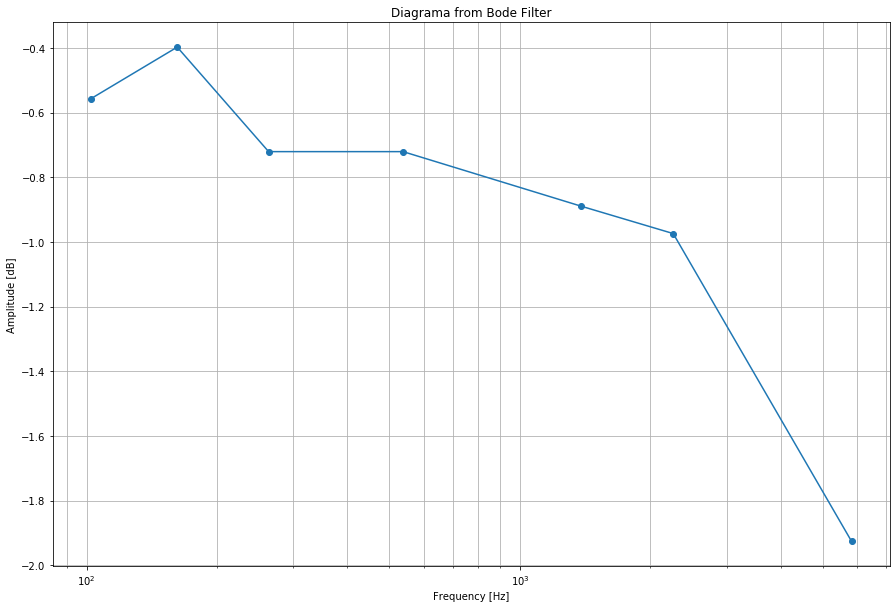

In [74]:
from scipy import signal
from matplotlib.figure import Figure 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#b, a = signal.butter(1, 1.0/(27e5*1.5e-9), 'low', analog=True)
b, a = signal.butter(1, 1.0/(100e3*1.5e-9), 'low', analog=True)
w, h = signal.freqs(b, a)
f_th = w/2*np.pi
g_th = 20 * np.log10(abs(h))
f_me =data.iloc[:, 4]

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
ph_me = -2.0*np.pi*(data.iloc[:, 3]/periods)

#ph_me=data.iloc[:,5]

##############
###EXPERIMENTAL#########
gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])

##########
####################BOTH######
plt.figure(figsize=(15, 10))
plt.semilogx(data.iloc[:, 3], gain, '-o')
plt.semilogx(gain, gain, '-o')

plt.grid(True, 'minor')
plt.grid(True, 'major')
#plt.ylim( (np.min(gain)-2.0, np.max(gain)+2.0) )
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.title("Diagrama from Bode Filter")
plt.show() 
##############################

C:\Users\grove\anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


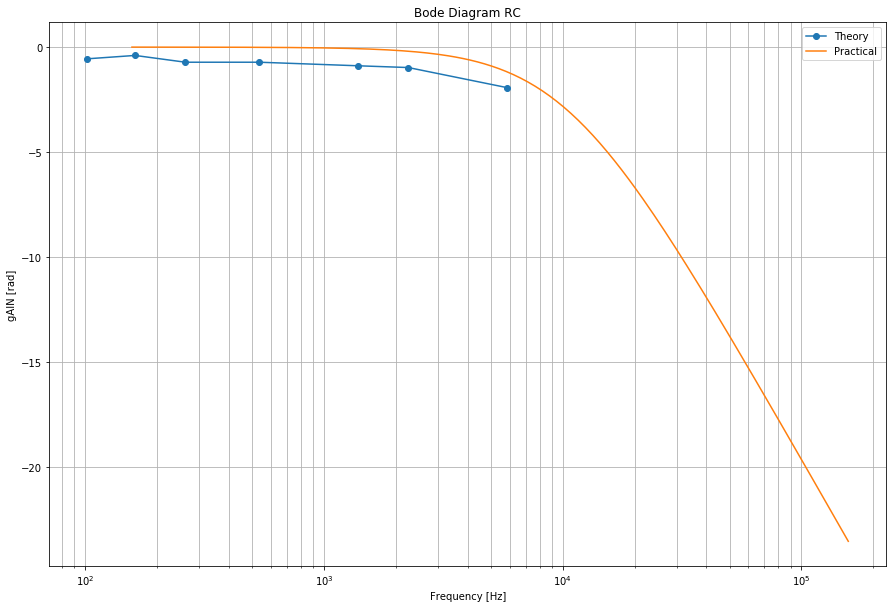

In [76]:
from scipy import signal

############Theoretical
#b, a = signal.butter(1, 1.0/(27e5*1.5e-9), 'low', analog=True)
b, a = signal.butter(1, 1.0/(2.7e6*22e-9), 'low', analog=True)
b, a = signal.butter(1, 1.0/(100e3*1.5e-9), 'low', analog=True)
#b, a = signal.butter(1, 1.0/(27e5*1.5e-9), 'low', analog=True)
w, h = signal.freqs(b, a)
f_th = w/2*np.pi
#g_th = 20 * np.log10(abs(h))
g_th = 20 * np.log10(abs(h)) 

f_me =data.iloc[:, 4]

ph_th = np.angle(h)


###########Plotting

f_me =data.iloc[:, 4]

gain = 20*np.log10(data.iloc[:, 2] / data.iloc[:, 1])

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
#ph_me = -2.0*np.pi*(data.iloc[:, 3]/periods)

ph_me=data.iloc[:,5]
#g_th = 20 * np.log10(abs(h))
g_th = 20*np.log10(abs(h))

plt.figure(figsize=(15, 10))
#plt.semilogx(f_th, g_th, '-')
##
plt.semilogx(data.iloc[:, 3], gain, '-o')
plt.semilogx(f_th, g_th, '-')

##

#plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('gAIN [rad]')
plt.xlabel(u'Frequency [Hz]')
plt.title("Bode Diagram RC")
plt.legend(("Theory","Practical"))


ax = plt.axes()
ax.set_facecolor("white")
# OR
ax.set(facecolor = "white")




#plt.margins(0.1, 0.1)
plt.savefig("Gain1.png")
plt.show()

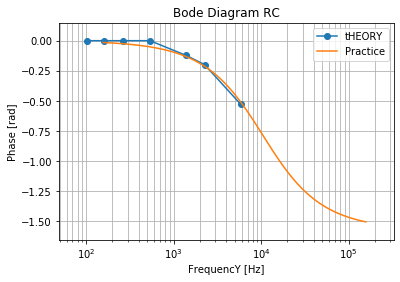

In [77]:
f_me =data.iloc[:, 4]

ph_th = np.angle(h)
periods = 1.0/data.iloc[:, 0]
ph_me = -2.0*np.pi*(data.iloc[:, 3]/periods)
#ph_me = 2.0*np.pi*(data.iloc[:, 5]/periods)

#ph_me=data.iloc[:,5]

plt.semilogx(data.iloc[:, 3], ph_me, '-o')


#plt.figure(figsize=(15, 10))
plt.semilogx(f_th, ph_th, '-')
#plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Phase [rad]')
plt.xlabel(u'FrequencY [Hz]')
plt.title("Bode Diagram RC")
plt.legend(("tHEORY","Practice"))
plt.margins(0.1, 0.1)
plt.savefig("Phase.png")
plt.show()